# <font color=red text>Projeto de análise - Iniciação Científica:</font> 
 ## O Impacto do Ensino de Biologia Molecular como Questão de Saúde Pública

In [1]:
# Importando as libs necessárias:
import pandas as pd 
import prince 
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt 

### DICIONÁRIO: 
**CONCORDANCIA** - É o grau de concordância com as perguntas; 
**NOTA**     - Medida do conhecimento em biomol

In [3]:
# Importando dados: 
dados = pd.read_excel('dados/Base_ICv2_AMOSTRA.xlsx', dtype=object) 
pd.set_option("display.max_columns", 999)

### Análise Descritiva: 

In [ ]:
dados.head()

In [ ]:
# Contagem de valores NULOS: 
for i in dados.columns:
    if dados[i].isnull().sum() != 0 :
        print(i, dados[i].isnull().sum())

In [ ]:
# Gerando tabela para contagem dos meios de conhecimento: 
meio_info_n = ["PROGRAMAS_DE_TV_E_TELEJORNAIS", "REDES_SOCIAIS_E_APP", "JORNAIS_E_REVISTAS", "RADIO"]
meio_info =[]

meio_info.append(dados.PROGRAMAS_DE_TV_E_TELEJORNAIS.sum())
meio_info.append(dados['REDES_SOCIAIS_E_APP'].sum())
meio_info.append(dados.JORNAIS_E_REVISTAS.sum())
meio_info.append(dados.RADIO.sum())

Meio_conhecimento = pd.DataFrame(meio_info, meio_info_n)
Meio_conhecimento.reset_index(inplace=True)
Meio_conhecimento.rename(columns={0 : "Quantidade_pessoas", "index":"Meio_info_n"}, inplace=True)
# Meio_conhecimento.rename(columns={}, inplace=True)

In [ ]:
Meio_conhecimento

In [ ]:
# Meio que rece informações: 
# PALETTES: deep, muted, pastel, bright, dark, and colorblind
ax = sns.barplot(x= Meio_conhecimento.Meio_info_n, 
                 y= Meio_conhecimento['Quantidade_pessoas'], 
                 hue=Meio_conhecimento['Quantidade_pessoas'])
ax.figure.set_size_inches(15,6)
ax.set_title("MEIO DE COMUNICAÇÃO QUE RECEBE INFORMAÇÕES", fontsize=18)
ax.set_xlabel('Meio que recebe informação', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.grid()

In [ ]:
a = pd.DataFrame(dados.Idade.value_counts())
a.reset_index(inplace=True)
a.rename(columns={"index": "Idades", "Idade": "Contagem_idades"}, inplace=True)

In [ ]:
dd = dados.groupby('Idade').agg({"NOTA": ["count"]})
dd.NOTA

In [ ]:
# Acertos com Idade
ax2 = sns.barplot(a.Idades, a.Contagem_idades, hue=a.Contagem_idades)
ax2.figure.set_size_inches(12,8)
ax2.set_xlabel('Idades', fontsize=15)
ax2.set_ylabel('Contagem das Idades', fontsize=15)
ax2.grid(axis='y')

In [ ]:
dados.info()

## Retirando amostras para análise: 

In [ ]:
# Devido não termos alguns valores nulos nas variáveis: 
'''
Graduacao 101
Area_de_Conhecimento 112
'''
# Fizemos sem essas variáveis a análise descritiva com a Anacor: 

In [5]:
# Amostra para ANACOR: 
a_anacor = dados[['Sexo','Idade', 'Ensino_Medio', 'NOTA' ]]


In [8]:
# Amostra para o QUI QUADRADO: 
a_qui = pd.crosstab(dados.NOTA, dados.CONCORDANCIA)
a_qui # Valores observados

CONCORDANCIA,0,2,3,4,5,6
NOTA,,,,,,
0,0,0,2,0,0,7
1,0,1,0,4,3,5
2,2,3,0,3,4,39
3,3,4,0,13,8,81
4,0,3,1,8,7,104


In [9]:
# COLOCAR EM PERCENTUAL : 
a_qui_p = pd.crosstab(dados.NOTA, dados.CONCORDANCIA, normalize=True) *100
a_qui_p = a_qui_p.round(3) # Valores observados
a_qui_p

CONCORDANCIA,0,2,3,4,5,6
NOTA,,,,,,
0,0.000,0.000,0.656,0.000,0.000,2.295
1,0.000,0.328,0.000,1.311,0.984,1.639
2,0.656,0.984,0.000,0.984,1.311,12.787
3,0.984,1.311,0.000,4.262,2.623,26.557
4,0.000,0.984,0.328,2.623,2.295,34.098


# Qui Quadrado 

In [ ]:
chi2, p, dof, ex = chi2_contingency(a_qui, correction=True)
print('X-squared = {}'.format(chi2.round(4)))
print('P_value = {:.10f}'.format(p))
print('dof = {}'.format(dof))
print('Expected Frequencies =\n {}'.format(pd.DataFrame(ex)))

In [ ]:
# Calculando os resíduos: 
res = (a_qui - ex)**2
res = res / ex
res

# Análise de Correspondência Multipla - HOMALS 

In [10]:
mca = prince.MCA(
    n_components=2, 
    n_iter=3, 
    copy = True, 
    check_input=True, 
    engine='auto')
mca = mca.fit(a_anacor)

Text(0.5, 1.03, 'Análise de Correspondência Multivariada (Homals) \n NOTAS POR CADA VARIÁVEL DESCRITIVA')

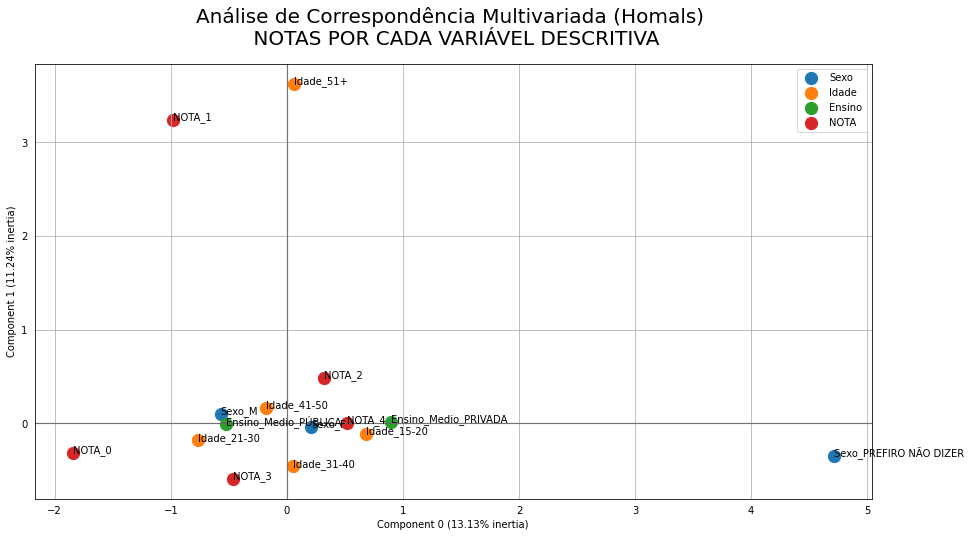

In [11]:
ax = mca.plot_coordinates(
        figsize=(15, 8),
        X=a_anacor,
        ax=None,
        show_row_points=False,
        row_points_size=150,
        row_points_alpha=0.6,
        show_row_labels=False, # Numero de cada linha
        show_column_points=True,
        column_points_size=150,
        show_column_labels=True # Rotulos 
        )
ax.set_title('Análise de Correspondência Multivariada (Homals) \n NOTAS POR CADA VARIÁVEL DESCRITIVA', fontsize=20, y=1.03)

# ax.get_figure().savefig('images/mca_coordinates.svg')

In [12]:
# Coordenadas das colunas: TABELA DE COMPONENTES
tb_component = mca.column_coordinates ( a_anacor )
tb_component = tb_component.rename(columns={0: 'COMPONENTE 0', 1: 'COMPONENTE 1'}, )
tb_component

,COMPONENTE 0,COMPONENTE 1
Sexo_F,0.211190,-0.041871
Sexo_M,-0.569795,0.100637
Sexo_PREFIRO NÃO DIZER,4.710943,-0.354391
Idade_15-20,0.682535,-0.110082
Idade_21-30,-0.769061,-0.181448
Idade_31-40,0.055458,-0.460040
Idade_41-50,-0.178763,0.165167
Idade_51+,0.058812,3.626250
Ensino_Medio_PRIVADA,0.893895,0.018716
Ensino_Medio_PÚBLICA,-0.526095,-0.011015


In [ ]:
mca.explained_inertia_

In [ ]:
# Medida de consistencia interna: 


In [13]:
tb_component.to_csv("TabelaComponentes.csv")

## Alguns Gráficos

In [ ]:
sns.boxplot(x=dados.NOTA)

In [ ]:
dados.head()

In [ ]:
# Teste de agrupamento: 
dados.groupby("Sexo")["Idade"].value_counts()